### EDA ON DATA FILTERED/SORTED FOR TS AND REGRESSION MODELS

In [50]:
from src.Prep import *
from src.Time_Series_Helper_Funcs import *
from src.Regression_Helper_Funcs import *
from src.ARIMA_Helper_Funcs import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%reload_ext autoreload

In [3]:
%autoreload

In [892]:
pd.set_option('display.max_columns', None)

In [719]:
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as ticker
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#data made specifically for regression and ARIMA model
df, diff = prep()

------------------------------------PREP------------------------------------
 1 of 12 |    Reading in data 
         |    Filtering to 5 features:
         |    Date, System Size, Total Cost, Customer Segment, State 
         |    Changing -9999 values to null
 2 of 12 |    Cleaning up column names
 3 of 12 |    Refining to only RES Customer Segment
 4 of 12 |    Sorting values by installation_date
         |    Assigning installation_date as index
 5 of 12 |    Replacing all null values with median values from same year
 6 of 12 |    Adusting prices for inflation
 7 of 12 |    Creating target variable: cost_per_watt
 8 of 12 |    Removing outliers above $25 per watt
 9 of 12 |    Resampling data into weekly medians
         |    Cropping dataframe to keep only continuous non-null data
10 of 12 |    Testing for stationarity
         |       ADF P-value: 0.9654 
         |       Time Series is not stationary.   
         |       Fail to reject ADF H0
11 of 12 |    Creating differenced d

In [6]:
cdf = df.copy()

In [49]:
eda_price(cdf)

,Max,Mean,Median,Mode,Min
Total Cost,"$10,554,704.02","$28,998.95","$22,975.27","$19,063.55",$0.01
Cost Per Watt,$24.99,$4.80,$4.56,$5.55,$0.00


In [20]:
file_path_1 = '/Users/jenniferpaige/Desktop/TTS_10-Dec-2019_p1.csv'
file_path_2 = '/Users/jenniferpaige/Desktop/TTS_10-Dec-2019_p2.csv'

In [21]:
#module details
mod_df1 = pd.read_csv(file_path_1,
                encoding='iso-8859-1',
                parse_dates=['Installation Date'], 
                usecols=['Installation Date', 'System Size','Total Installed Price', 
                         'Customer Segment', 'State','Battery System', 'Module Manufacturer #1', 
                         'Module Model #1', 'Module Manufacturer #2', 'Module Model #2', 
                         'Module Manufacturer #3','Module Model #3', 'Additional module model', 
                         'Module Technology #1','Module Technology #2', 'Module Technology #3', 
                         'BIPV Module #1','BIPV Module #2', 'BIPV Module #3', 
                         'Module Efficiency #1','Module Efficiency #2', 'Module Efficiency #3'] 
                          , na_values=(-9999, '-9999'))


mod_df2 = pd.read_csv(file_path_2,
                encoding='iso-8859-1',
                parse_dates=['Installation Date'], 
                usecols=['Installation Date', 'System Size','Total Installed Price', 
                         'Customer Segment', 'State','Battery System', 'Module Manufacturer #1', 
                         'Module Model #1', 'Module Manufacturer #2', 'Module Model #2', 
                         'Module Manufacturer #3','Module Model #3', 'Additional module model', 
                         'Module Technology #1','Module Technology #2', 'Module Technology #3', 
                         'BIPV Module #1','BIPV Module #2', 'BIPV Module #3', 
                         'Module Efficiency #1','Module Efficiency #2', 'Module Efficiency #3'] 
                          , na_values=(-9999, '-9999'))

mod_df = pd.concat([mod_df1,mod_df2], ignore_index=True)

mod_df.columns = mod_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
mod_df.sort_values('installation_date', inplace=True)
mod_df.set_index('installation_date', drop=True, inplace=True)
[mod_df['total_installed_price'].replace(np.nan,round(mod_df.loc[(mod_df['total_installed_price'] != np.nan) & (mod_df.index.year == i)]['total_installed_price'].median(),2),inplace=True) for i in range(1998,2019)] 
mod_df['date'] = mod_df.index.date
mod_df['adj_installed_price'] = round(mod_df.apply(lambda x:cpi.inflate(x.total_installed_price, x.date), axis=1),2)
mod_df['cost_per_watt'] = round(mod_df['adj_installed_price']/ mod_df['system_size']/1000,2)

In [25]:
state_count = pd.DataFrame(mod_df.groupby('state')['system_size'].count().sort_values(ascending=False))
state_count.rename(columns={'system_size':'count'}, inplace=True)
state_count['state'] = state_count.index

In [23]:
segments = pd.DataFrame(mod_df.groupby('customer_segment')['state'].count().sort_values(ascending=False))
segments.rename(columns={'state':'count'}, inplace=True)
segments['segment'] = segments.index

In [51]:
sys_sizes = pd.DataFrame(mod_df.system_size.sort_values())
sys_sizes.reset_index(drop=True, inplace=True)
sizes_grouped = sys_sizes.groupby(pd.cut(sys_sizes['system_size'], bins=10).sort_values()).count()
sizes_grouped.rename(columns={'system_size':'count'}, inplace=True)
sizes_grouped['system_size'] = sizes_grouped.index

In [76]:
adj_price = pd.DataFrame(mod_df.adj_installed_price.sort_values())
adj_price.reset_index(drop=True, inplace=True)
adj_price_grouped = adj_price.groupby(pd.cut(adj_price['adj_installed_price'], bins=10).sort_values()).count()
adj_price_grouped.rename(columns={'adj_installed_price':'count'}, inplace=True)

In [77]:
per_watt = pd.DataFrame(mod_df.cost_per_watt.sort_values())
per_watt.reset_index(drop=True, inplace=True)
per_watt_grouped = per_watt.groupby(pd.cut(per_watt['cost_per_watt'], bins=10).sort_values()).count()
per_watt_grouped.rename(columns={'cost_per_watt':'count'}, inplace=True)

In [1055]:
cdf

,system_size,total_installed_price,customer_segment,state,date,adj_installed_price,cost_per_watt
installation_date,,,,,,,
1998-01-30,4.251500,17439.0,RES,CA,1998-01-30,27854.38,6.55
1998-04-08,2.331600,30941.0,RES,CA,1998-04-08,49146.68,21.08
1998-04-30,4.181100,17439.0,RES,CA,1998-04-30,27700.11,6.63
1998-07-07,2.282400,24500.0,RES,CA,1998-07-07,38748.88,16.98
1998-07-10,3.113265,17439.0,RES,CA,1998-07-10,27581.30,8.86
...,...,...,...,...,...,...,...
2018-12-31,5.760000,22000.0,RES,CA,2018-12-31,22602.64,3.92
2018-12-31,4.410000,21610.0,RES,CA,2018-12-31,22201.96,5.03
2018-12-31,8.640000,45958.6,RES,CA,2018-12-31,47217.54,5.46


In [ ]:
shp_path = "./cb_2017_us_state_5m/cb_2017_us_state_5m.shp"
sf = shp.Reader(shp_path)
# Continental US
y_lim = (23, 50) # lat 
x_lim = (-128, -65) # long
state_id = [0, 10, 3, 5, 6, 7, 8, 30]
plot_map_fill_multiples_ids("US - States", state_id, sf, x_lim, 
                             y_lim, color = 'r', figsize = (15,9))

In [1124]:
data_states = sorted(cdf['state'].unique())

In [1106]:
state_list = ['AL','AR','AZ','CA','CO','CT','DE','FL','GA','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY']

In [1102]:
state_list = sorted(cdf['state'].unique())

In [ ]:
sns.scatterplot()

In [1134]:
data_states

['AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'KS',
 'MA',
 'MD',
 'MN',
 'MO',
 'NH',
 'NJ',
 'NM',
 'NY',
 'OH',
 'OR',
 'PA',
 'RI',
 'TX',
 'UT',
 'VT',
 'WI']

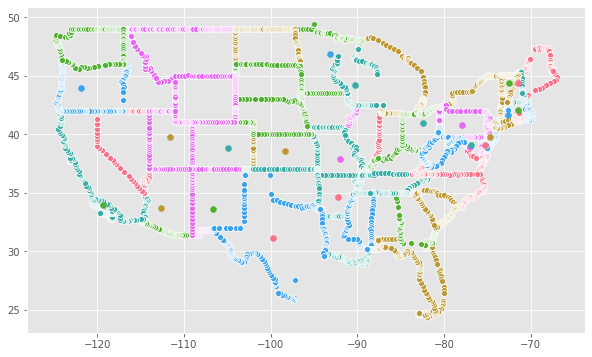

In [1159]:
for i in range(len(state_list)):
    sns.scatterplot(x=states.get(state_list[i]).get('lons'), y=states.get(state_list[i]).get('lats'))
plt.scatter(x= -92.23438148148148 , y= 34.594918950617284 )
plt.scatter(x= -112.63627764423077 , y= 33.70747048076923 )
plt.scatter(x= -119.36976 , y= 33.95636 )
plt.scatter(x= -104.8565361111111 , y= 38.8473224691358 )
plt.scatter(x= -72.60528913580247 , y= 41.64338679012346 )
plt.scatter(x= -77.02271925925925 , y= 38.89007981481482 )
plt.scatter(x= -75.29536161073825 , y= 39.06134590604027 )
#plt.scatter(x= nan , y= nan )
plt.scatter(x= -98.31055953703705 , y= 38.554094444444445 )
plt.scatter(x= -71.49510621276596 , y= 42.06037804255319 )
plt.scatter(x= -76.88955737179488 , y= 39.03157057692307 )
plt.scatter(x= -93.16171829694323 , y= 46.81078384279476 )
plt.scatter(x= -92.01598413934425 , y= 37.8658443442623 )
plt.scatter(x= -71.41919605555556 , y= 44.395385555555556 )
plt.scatter(x= -74.6631791160221 , y= 39.77937933701657 )
plt.scatter(x= -106.65696052884617 , y= 33.61165495192308 )
#plt.scatter(x= nan , y= nan )
plt.scatter(x= -82.4470864423077 , y= 40.93523677884615 )
plt.scatter(x= -121.85101105769232 , y= 43.90445509615384 )
plt.scatter(x= -77.91258857142857 , y= 40.798321375661374 )
#plt.scatter(x= nan , y= nan )
plt.scatter(x= -99.73212062500001 , y= 31.09680326923077 )
plt.scatter(x= -111.55191696296296 , y= 39.720850222222225 )
plt.scatter(x= -72.54081629834253 , y= 44.361167569060775 )
plt.scatter(x= -90.2909401851852 , y= 44.14896916666667 )
plt.show()

In [1161]:
pip install geopandas

     |████████████████████████████████| 928 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 46.3 MB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 17.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1162]:
import geopandas

In [ ]:
geopandas.plotting.plot_point_collection()

In [ ]:
states.get('AR').get('lons') 
states.get('AZ').get('lats')

In [1147]:
759/2

379.5

In [1148]:
(states.get('CA').get('lats'))[380]

33.95636

In [1154]:
(states.get('CA').get('lons'))[380]

-119.36976

In [1133]:
for i in data_states:
    print("sns.scatterplot(x=",np.mean(states.get(i).get('lons')),', y=', np.mean(states.get(i).get('lats')), ')')


sns.scatterplot(x= -92.23438148148148 , y= 34.594918950617284 )
sns.scatterplot(x= -112.63627764423077 , y= 33.70747048076923 )
sns.scatterplot(x= nan , y= nan )
sns.scatterplot(x= -104.8565361111111 , y= 38.8473224691358 )
sns.scatterplot(x= -72.60528913580247 , y= 41.64338679012346 )
sns.scatterplot(x= -77.02271925925925 , y= 38.89007981481482 )
sns.scatterplot(x= -75.29536161073825 , y= 39.06134590604027 )
sns.scatterplot(x= nan , y= nan )
sns.scatterplot(x= -98.31055953703705 , y= 38.554094444444445 )
sns.scatterplot(x= -71.49510621276596 , y= 42.06037804255319 )
sns.scatterplot(x= -76.88955737179488 , y= 39.03157057692307 )
sns.scatterplot(x= -93.16171829694323 , y= 46.81078384279476 )
sns.scatterplot(x= -92.01598413934425 , y= 37.8658443442623 )
sns.scatterplot(x= -71.41919605555556 , y= 44.395385555555556 )
sns.scatterplot(x= -74.6631791160221 , y= 39.77937933701657 )
sns.scatterplot(x= -106.65696052884617 , y= 33.61165495192308 )
sns.scatterplot(x= nan , y= nan )
sns.scatterplo

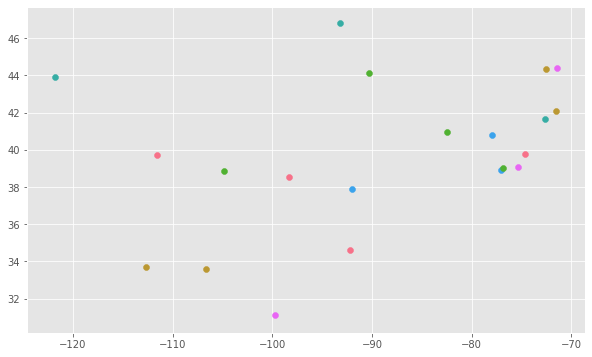

In [1130]:
plt.scatter(x= -92.23438148148148 , y= 34.594918950617284 )
plt.scatter(x= -112.63627764423077 , y= 33.70747048076923 )
#plt.scatter(x= nan , y= nan )
plt.scatter(x= -104.8565361111111 , y= 38.8473224691358 )
plt.scatter(x= -72.60528913580247 , y= 41.64338679012346 )
plt.scatter(x= -77.02271925925925 , y= 38.89007981481482 )
plt.scatter(x= -75.29536161073825 , y= 39.06134590604027 )
#plt.scatter(x= nan , y= nan )
plt.scatter(x= -98.31055953703705 , y= 38.554094444444445 )
plt.scatter(x= -71.49510621276596 , y= 42.06037804255319 )
plt.scatter(x= -76.88955737179488 , y= 39.03157057692307 )
plt.scatter(x= -93.16171829694323 , y= 46.81078384279476 )
plt.scatter(x= -92.01598413934425 , y= 37.8658443442623 )
plt.scatter(x= -71.41919605555556 , y= 44.395385555555556 )
plt.scatter(x= -74.6631791160221 , y= 39.77937933701657 )
plt.scatter(x= -106.65696052884617 , y= 33.61165495192308 )
#plt.scatter(x= nan , y= nan )
plt.scatter(x= -82.4470864423077 , y= 40.93523677884615 )
plt.scatter(x= -121.85101105769232 , y= 43.90445509615384 )
plt.scatter(x= -77.91258857142857 , y= 40.798321375661374 )
#plt.scatter(x= nan , y= nan )
plt.scatter(x= -99.73212062500001 , y= 31.09680326923077 )
plt.scatter(x= -111.55191696296296 , y= 39.720850222222225 )
plt.scatter(x= -72.54081629834253 , y= 44.361167569060775 )
plt.scatter(x= -90.2909401851852 , y= 44.14896916666667 )

In [ ]:
31.09680326923077

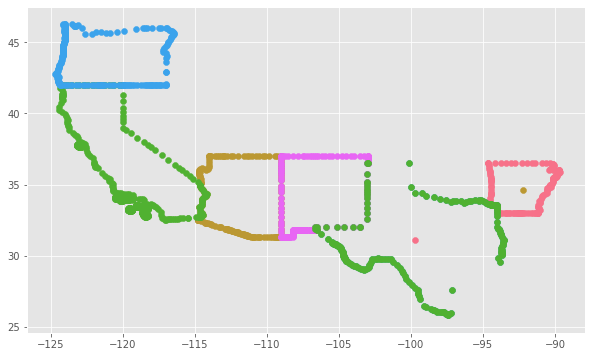

In [1127]:
plt.scatter(x=states.get('AR').get('lons'), y=states.get('AR').get('lats'))
plt.scatter(x=states.get('AZ').get('lons'), y=states.get('AZ').get('lats'))
plt.scatter(x=states.get('CA').get('lons'), y=states.get('CA').get('lats'))
plt.scatter(x=states.get('TX').get('lons'), y=states.get('TX').get('lats'))
plt.scatter(x=states.get('OR').get('lons'), y=states.get('OR').get('lats'))
plt.scatter(x=states.get('NM').get('lons'), y=states.get('NM').get('lats'))
plt.scatter(x= -99.73212062500001, y=31.09680326923077)
plt.scatter(x= -92.23438148148148 ,y=34.594918950617284)
plt.scatter(x=states.get('TX').get('lons'), y=states.get('TX').get('lats'))
plt.show()

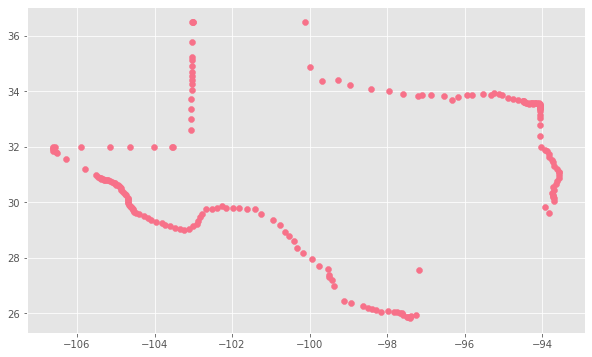

In [1085]:
plt.scatter(x=states.get('TX').get('lons'), y=states.get('TX').get('lats'))

In [1083]:
states.get('TX').get('lats')

{'name': 'Texas',
 'region': 'Southwest',
 'lats': [33.56679,
  33.56763,
  33.55209,
  33.57438,
  33.59046,
  33.55937,
  33.58216,
  33.55404,
  33.55175,
  33.49066,
  33.46722,
  33.44967,
  33.4376,
  33.42372,
  33.40633,
  33.38629,
  33.35086,
  33.27941,
  33.13883,
  33.01922,
  32.77023,
  32.40053,
  31.99564,
  31.89178,
  31.85076,
  31.7436,
  31.62955,
  31.518,
  31.443,
  31.31095,
  31.20427,
  31.09414,
  31.09387,
  30.9912,
  30.87612,
  30.75555,
  30.67047,
  30.55335,
  30.43888,
  30.32839,
  30.24845,
  30.21093,
  30.17712,
  30.13622,
  30.05662,
  29.80964,
  29.59583,
  27.5672,
  25.94827,
  25.90896,
  25.83921,
  25.85572,
  25.8789,
  25.94065,
  25.99861,
  26.0259,
  26.03042,
  26.05616,
  26.06714,
  26.05585,
  26.11703,
  26.15718,
  26.20134,
  26.24539,
  26.37877,
  26.45192,
  26.98045,
  27.18199,
  27.28955,
  27.3865,
  27.58981,
  27.70531,
  27.94116,
  28.16745,
  28.34441,
  28.58867,
  28.79928,
  28.93753,
  29.16909,
  29.34771,
 

In [1084]:
states.get('TX').get('lons')

[-94.26958,
 -94.26926,
 -94.23197,
 -94.19515,
 -94.17241,
 -94.13238,
 -94.07521,
 -94.0714,
 -94.04484,
 -94.04311,
 -94.04312,
 -94.04312,
 -94.04311,
 -94.04309,
 -94.04313,
 -94.04313,
 -94.04307,
 -94.04299,
 -94.04311,
 -94.04296,
 -94.04318,
 -94.0429,
 -94.03082,
 -93.93041,
 -93.88414,
 -93.83041,
 -93.82065,
 -93.74373,
 -93.70942,
 -93.68743,
 -93.60701,
 -93.55358,
 -93.55372,
 -93.57217,
 -93.57107,
 -93.61448,
 -93.65349,
 -93.73106,
 -93.69813,
 -93.75524,
 -93.70914,
 -93.71961,
 -93.70656,
 -93.70145,
 -93.70054,
 -93.92799,
 -93.82579,
 -97.16555,
 -97.25026,
 -97.36981,
 -97.39965,
 -97.44891,
 -97.48742,
 -97.57798,
 -97.62202,
 -97.6772,
 -97.749,
 -97.82533,
 -97.98193,
 -98.15616,
 -98.27914,
 -98.38481,
 -98.4801,
 -98.63331,
 -98.92182,
 -99.10065,
 -99.381,
 -99.42732,
 -99.4876,
 -99.49271,
 -99.53514,
 -99.75087,
 -99.93727,
 -100.15794,
 -100.31258,
 -100.40621,
 -100.5334,
 -100.64375,
 -100.77299,
 -100.95073,
 -101.24129,
 -101.40912,
 -101.61168,
 -10

In [1068]:
plt.scatter(states)

TypeError: scatter() missing 1 required positional argument: 'y'

In [1062]:
cdf.groupby('state').count()

,system_size,total_installed_price,customer_segment,date,adj_installed_price,cost_per_watt
state,,,,,,
AR,91,91,91,91,91,91
AZ,134724,134724,134724,134724,134724,134724
CA,874034,874034,874034,874034,874034,874034
CO,44403,44403,44403,44403,44403,44403
CT,15900,15900,15900,15900,15900,15900
DC,3731,3731,3731,3731,3731,3731
DE,2276,2276,2276,2276,2276,2276
FL,2650,2650,2650,2650,2650,2650
KS,131,131,131,131,131,131


TypeError: Invalid comparison between dtype=int64 and str

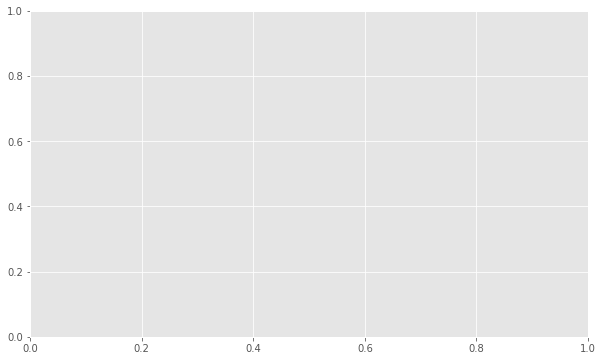

In [1060]:
plt.hist2d(x='state', y='date', data)

In [1058]:
cdf[['date', 'state']].groupby('state').count()

,date
state,
AR,91
AZ,134724
CA,874034
CO,44403
CT,15900
DC,3731
DE,2276
FL,2650
KS,131


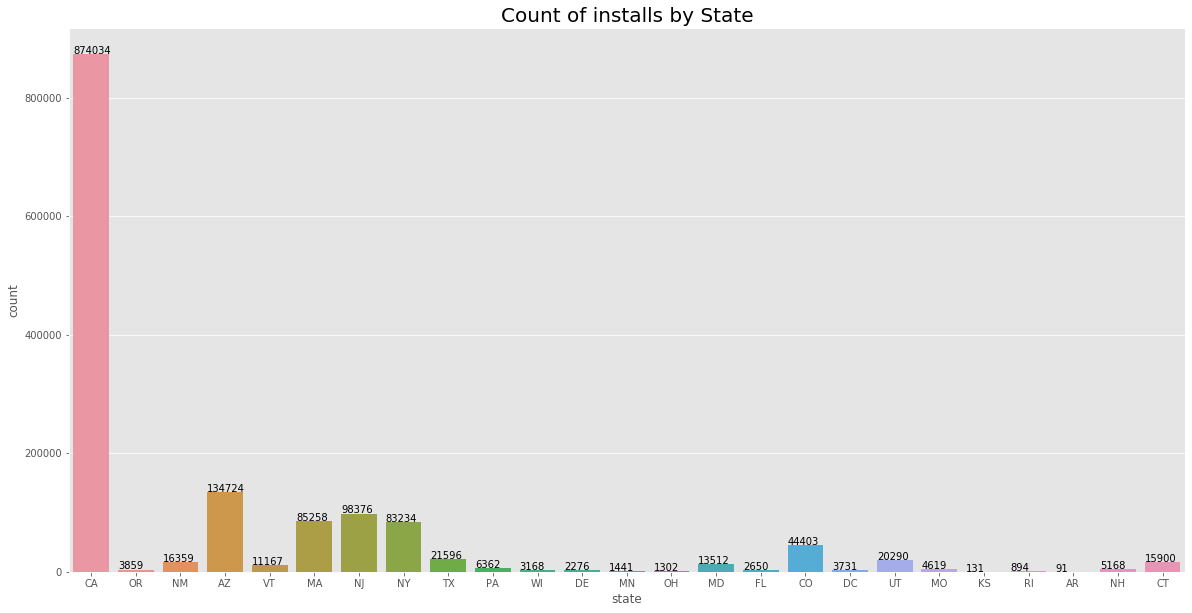

In [54]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='state', data=cdf)
plt.title('Count of installs by State', fontsize=20)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()+100))
plt.show()

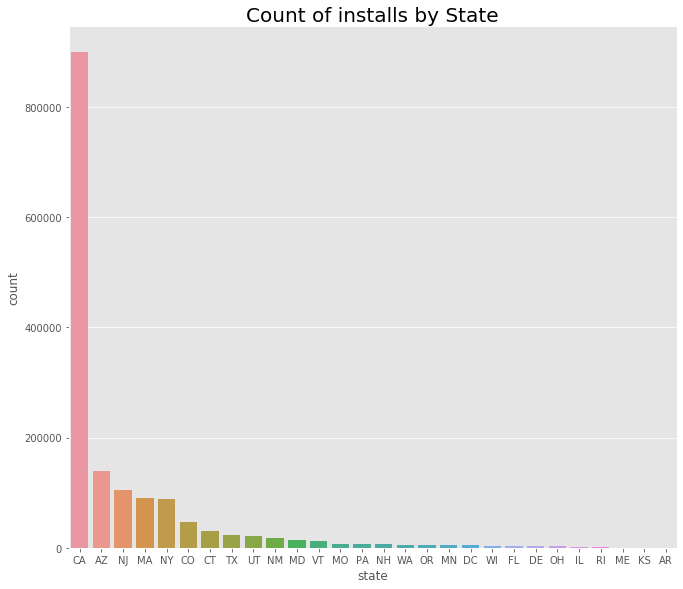

In [48]:
sns.catplot(x='state', y='count', data=state_count, kind='bar', height=8,aspect=1.2)
plt.title('Count of installs by State', fontsize=20)
plt.show()

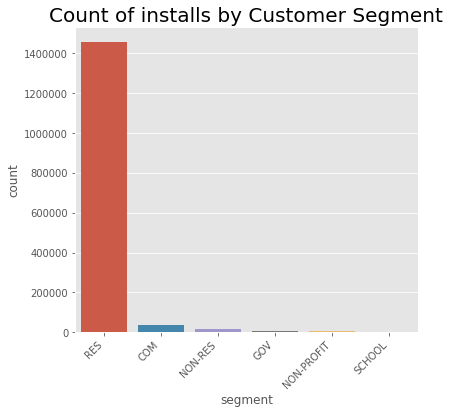

In [240]:
sns.catplot(x='segment', y='count', data=segments, kind='bar', height=5,aspect=1.2)
plt.title('Count of installs by Customer Segment', fontsize=20)
plt.xticks( rotation=45, horizontalalignment='right',fontweight='light')
plt.show()

In [902]:
sm_df['date'] = sm_df.index
sm_df['num_of_days']  = sm_df['date'] - sm_df['date'][0]
sm_df['num_of_days'] = sm_df['num_of_days'].dt.days

In [740]:
sm_df = mod_df[['system_size','total_installed_price','customer_segment','state','adj_installed_price','cost_per_watt']]

In [784]:
wattbins = [-.01, 2.15, 3, 3.75, 4.4, 5.15, 6, 8,722000]
sm_df['watt_group'] = pd.cut(sm_df['cost_per_watt'], wattbins)

In [785]:
sys_bins = [0.0, 2.5, 5.0, 7.5, 10, 12.5, 17.5, 42.5, 18000]
sm_df['sys_size_group'] = pd.cut(sm_df['system_size'], sys_bins)

In [1042]:
cs_df = sm_df.loc[(sm_df['customer_segment']=='RES')& (sm_df['adj_installed_price'] < 100001)]

In [1012]:
cost_bins =  [0.00, 12500, 25000, 37500, 50000, 62500, 75000, 87500, 100001]
cs_df['adj_cost_group'] = pd.cut(cs_df['adj_installed_price'], cost_bins)

In [1049]:
print()
print('Average cost per watt for Residential customers given size of system and year'.upper().center(94, '='))
print()
pd.pivot_table(cs_df, values='cost_per_watt', index='year', columns='sys_size_group')


========AVERAGE COST PER WATT FOR RESIDENTIAL CUSTOMERS GIVEN SIZE OF SYSTEM AND YEAR=========



sys_size_group,"(0.0, 2.5]","(2.5, 5.0]","(5.0, 7.5]","(7.5, 10.0]","(10.0, 12.5]","(12.5, 17.5]","(17.5, 42.5]","(42.5, 18000.0]"
year,,,,,,,,
1998,40.672857,7.613333,5.110000,NaN,NaN,NaN,NaN,NaN
1999,14.539753,9.158472,7.860833,5.959231,5.845000,5.200000,NaN,NaN
2000,16.647789,10.196897,9.395385,5.548889,7.030000,NaN,NaN,NaN
2001,14.745166,11.298394,10.157391,6.941304,5.530000,1.940000,1.450000,NaN
2002,14.763514,11.352275,9.403167,5.786098,4.699677,5.670000,1.170000,NaN
2003,13.339512,10.843786,9.861588,8.772857,3.342571,1.654444,1.220000,NaN
2004,12.828782,10.120723,9.429447,8.807820,5.524247,2.818333,1.068571,0.392500
2005,14.421759,9.549320,8.862491,8.922231,6.611429,2.550588,1.239091,NaN
2006,11.717078,9.752058,9.074183,8.738994,6.226778,4.573000,1.372727,0.290000


In [426]:
per_watt = pd.DataFrame(mod_df.cost_per_watt.sort_values())
per_watt = per_watt.sort_values(by='cost_per_watt', ascending=True)
# per_watt.reset_index(drop=True, inplace=True)

In [582]:
watt_groups = per_watt.copy()

In [564]:
watt_groups.groupby('size_group').count().index

CategoricalIndex([  (0.0, 2.5],   (2.5, 5.0],   (5.0, 7.5],  (7.5, 10.0],
                  (10.0, 12.5], (12.5, 15.0], (15.0, 17.5], (17.5, 20.0]],
                 categories=[(0.0, 2.5], (2.5, 5.0], (5.0, 7.5], (7.5, 10.0], (10.0, 12.5], (12.5, 15.0], (15.0, 17.5], (17.5, 20.0]], ordered=True, name='size_group', dtype='category')

In [604]:
bins = [-.01, 2.15, 3, 3.75, 4.4, 5.15, 6, 8,722000]
watt_groups['size_group'] = pd.cut(watt_groups['cost_per_watt'], bins)
watt_groups.groupby('size_group').count()

,cost_per_watt
size_group,
"(-0.01, 2.15]",146805
"(2.15, 3.0]",151446
"(3.0, 3.75]",206275
"(3.75, 4.4]",223727
"(4.4, 5.15]",249294
"(5.15, 6.0]",266596
"(6.0, 8.0]",156397
"(8.0, 722000.0]",143291


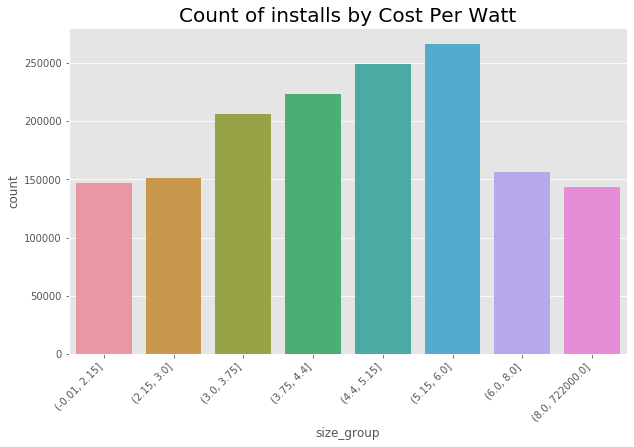

In [605]:
sns.countplot(x='size_group', data=watt_groups)
plt.title('Count of installs by Cost Per Watt', fontsize=20)
plt.xticks( rotation=45, horizontalalignment='right',fontweight='light')
plt.show()

In [ ]:
bins2 = [0.0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]

In [ ]:
watt_groups['size_group'] = pd.cut(watt_groups['cost_per_watt'], bins)

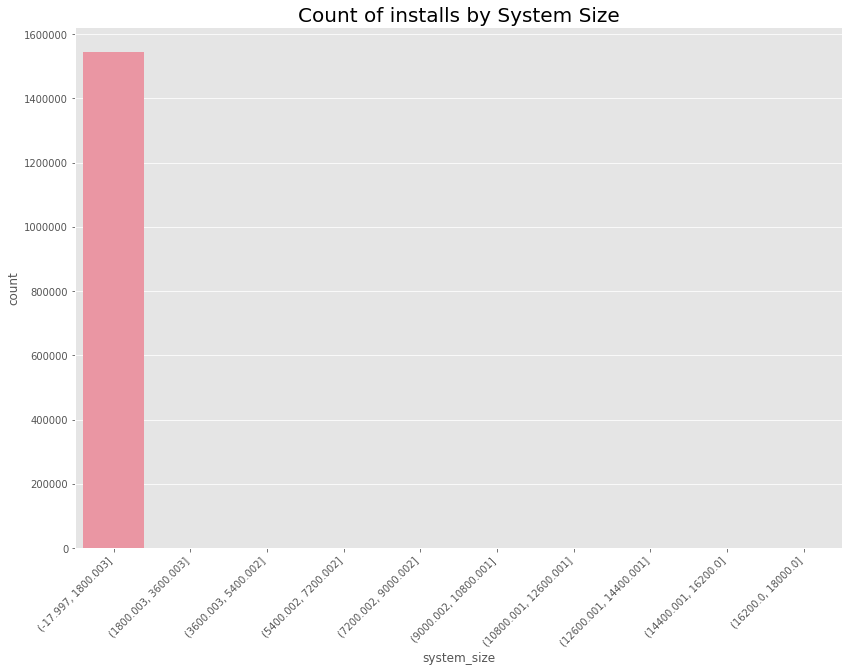

In [236]:
sns.catplot(x='system_size', y='count', data=sizes_grouped, kind='bar', height=8,aspect=1.5)
plt.title('Count of installs by System Size', fontsize=20)
plt.xticks( rotation=45, horizontalalignment='right',fontweight='light')
plt.show()

In [ ]:
sys_sizes = pd.DataFrame(mod_df.system_size.sort_values())
sys_sizes.reset_index(drop=True, inplace=True)

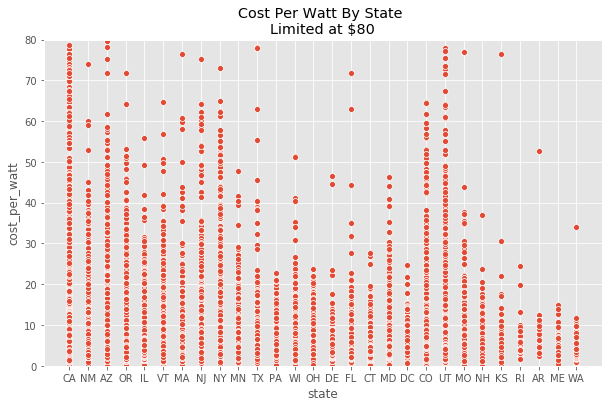

In [517]:
sns.scatterplot(x='state', y='cost_per_watt', data=mod_df)
plt.title('Cost Per Watt By State \nLimited at $80')
plt.ylim(0,80)
plt.show()

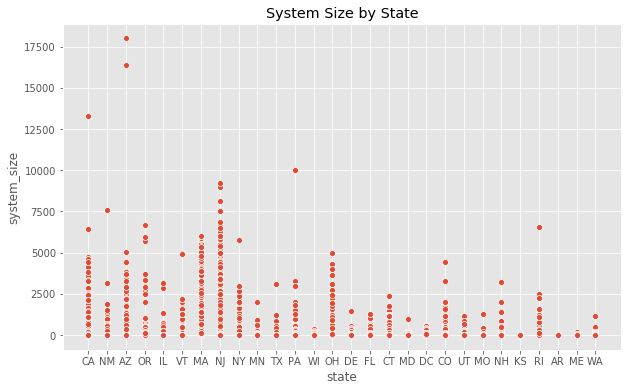

In [518]:
sns.scatterplot(x='state', y='system_size', data=mod_df, )
plt.title('System Size by State')
plt.show()

In [525]:
moddf = mod_df.copy()

In [535]:
moddf['year'] = moddf.index.year

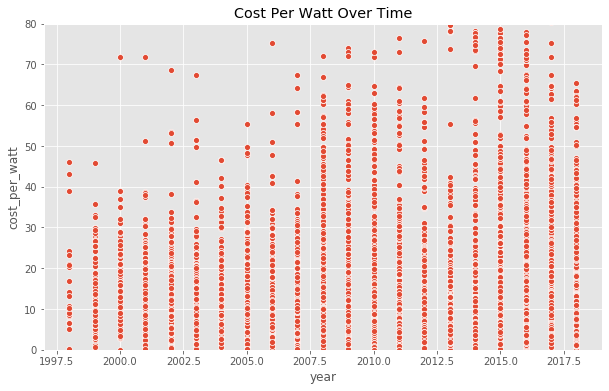

In [539]:
sns.scatterplot(x='year', y='cost_per_watt', data=moddf)
plt.title('Cost Per Watt By Year')
plt.ylim(0,80)
plt.show()

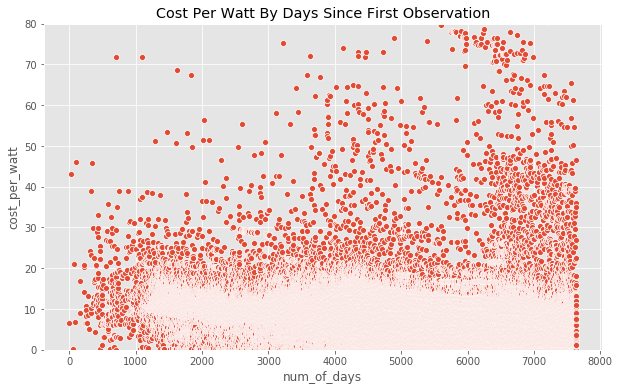

In [723]:
sns.scatterplot(x='num_of_days', y='cost_per_watt', data=moddf)
plt.title('Cost Per Watt By Days Since First Observation')
plt.axis(ymin=0, ymax=80)
plt.show()

In [724]:
moddf

,system_size,total_installed_price,customer_segment,battery_system,state,module_manufacturer_#1,module_model_#1,module_manufacturer_#2,module_model_#2,module_manufacturer_#3,...,bipv_module_#3,module_efficiency_#1,module_efficiency_#2,module_efficiency_#3,date,adj_installed_price,cost_per_watt,year,num_of_days,scalesize
installation_date,,,,,,,,,,,,,,,,,,,,,
1998-01-30,4.2515,17640.08,RES,0.0,CA,NaN,no match,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1998-01-30,28175.55,6.63,1998,0,1.417167
1998-03-01,0.6500,17640.08,RES,NaN,NM,NaN,no match,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1998-03-01,28071.33,43.19,1998,30,0.216667
1998-04-01,110.3000,17640.08,NON-RES,0.0,AZ,NaN,no match,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1998-04-01,28019.50,0.25,1998,61,36.766667
1998-04-08,2.3316,30941.00,RES,0.0,CA,Sharp,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1998-04-08,49146.68,21.08,1998,68,0.777200
1998-04-30,4.1811,17640.08,RES,0.0,CA,NaN,no match,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1998-04-30,28019.50,6.70,1998,90,1.393700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,5.7035,22030.50,RES,0.0,CA,LONGi Green Energy Technology Co,LR6-60PB-300M,NaN,NaN,NaN,...,NaN,0.183486,NaN,NaN,2018-12-31,22633.98,3.97,2018,7640,1.901167
2018-12-31,3.3000,24750.00,RES,0.0,CA,Silfab,SLA300M,NaN,NaN,NaN,...,NaN,0.184049,NaN,NaN,2018-12-31,25427.97,7.71,2018,7640,1.100000
2018-12-31,4.2000,29400.00,RES,0.0,CA,Silfab,SLA300M,NaN,NaN,NaN,...,NaN,0.184049,NaN,NaN,2018-12-31,30205.35,7.19,2018,7640,1.400000


In [ ]:
def M_S_E(y_true, y_pred):
    return (mean_squared_error(y_true, y_pred))

# Create the hyperparameter grid, just poly degree
poly_space = np.arange(1, 10)
param_grid = {'features__num_vars__poly__degree': poly_space}

idx = round(len(lag_df)*.8)

# Create train and test sets
X_train, X_test, y_train, y_test = 
(X, y, test_size=0.30, random_state=21)

# build the scoring map
scoring = {'MSE': make_scorer(M_S_E, greater_is_better=False)}

# Create the GridSearchCV object: gs_cv
gs_cv = GridSearchCV(pipeline, param_grid, cv=3, scoring=scoring, 
                     return_train_score=True)

# Fit to the training set
gs_cv.fit(X_train, y_train)

# Compute and print the metrics
thescore = gs_cv.score(X_test, y_test)
print("Best parameters: {}".format(gs_cv.best_params_))
print("test R squared: {}".format(thescore))

# uncomment to see results ds
#r2# gs_cv.cv_results_

In [ ]:
gs_cv = GridSearchCV(pipeline, param_grid, cv=3, scoring=scoring, 
                     return_train_score=True, refit='Rsquared', verbose=3)

In [ ]:
#show r2
thescore = gs_cv.score(X_test, y_test)
print("Best parameters: {}".format(gs_cv.best_params_))
print("Best R squared: {}".format(thescore))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Actual vs. Best Model Prediction on Test Set')

ax1.scatter(y_test, gs_cv.predict(X_test), marker='.', s=10, color='royalblue', alpha=1, label='actual')
ax1.plot(np.array([1,20]), np.array([1,20]), linewidth=1, color='red', label='predicted')
ax1.set_ylabel('Predicted')
ax1.set_xlabel('Actual')
ax1.legend()

ax2.scatter(X_test['num_of_days'], y_test, marker='.', color='royalblue', s=20, alpha=0.9, label='actual')
ax2.scatter(X_test['num_of_days'], gs_cv.predict(X_test), marker='.', color='red', s=5, alpha=.8, label='predicted')
ax2.set_ylabel('Cost/watt')
ax2.set_xlabel('days since epoch')
ax2.legend()

plt.show();

In [630]:
plt.plot(mod_df['total_installed_price'], label='Total $')
plt.plot(mod_df['adj_installed_price'], label='Adj $')
plt.axis(ymin=0, ymax=40000)
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 720x432 with 1 Axes>

In [640]:
moddf['num_of_days']  = moddf['date'] - moddf['date'][0]
moddf['num_of_days'] = moddf['num_of_days'].dt.days

In [648]:
moddf.rename(columns={'Num of Days': 'num_of_days'}, inplace=True)

In [704]:
MedByDay = moddf.groupby(['num_of_days'])['cost_per_watt'].median()

In [705]:
MedByDay = MedByDay.reset_index()

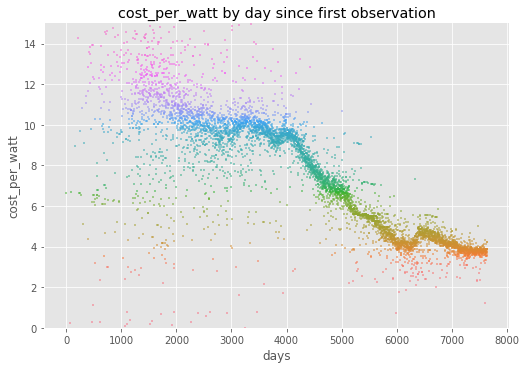

In [712]:
g = sns.FacetGrid(MedByDay, hue='cost_per_watt', size=5, aspect=1.5)
g.map(plt.scatter, 'num_of_days', 'cost_per_watt', s=5, marker='+', alpha=0.5)
g.ax.set(xlabel='days',
         ylabel='cost_per_watt', ylim=(0,15),
         title='cost_per_watt by day since first observation')
plt.show()

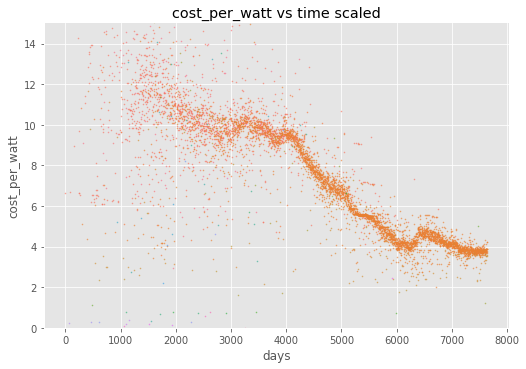

In [701]:
g = sns.FacetGrid(MedByDay, hue='scalesize', size=5, aspect=1.5)
g.map(plt.scatter, 'num_of_days', 'cost_per_watt', s=5, marker='.', alpha=0.5)
g.ax.set(xlabel='days',
         ylabel='cost_per_watt', ylim=(0,15),
         title='cost_per_watt vs time scaled')
g.ax.legend;

In [1163]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)